## Leaky Integrate and Fire (LIF) Model : 
Replicated from :https://mrgreene09.github.io/computational-neuroscience-textbook/Ch3.html#leaky-integrate-and-fire-model
\
The Leaky Integrate-and-Fire (LIF) model is a simple yet effective model used to describe the behavior of a neuron, particularly its membrane potential over time. This model is based on the idea that the neuron integrates incoming stimuli (current), and once the membrane potential reaches a certain threshold, it "fires" (producing an action potential), and then resets.
The membrane potential of the neuron,$V(t)$, evolves over time based on the balance between the incoming current and the leakage (which causes the potential to decay back to a resting state). When the membrane potential crosses a threshold, the neuron fires and its voltage is reset to a lower value.

#### Differential Equation for LIF Model
The basic equation governing the LIF model is:

$$
\tau_m \frac{dV(t)}{dt} = - (V(t) - V_{\text{rest}}) + R_m I(t)
$$

Where:
-  $𝑉(𝑡)$ = Membrane potential at time $t(mV)$
-  $𝑉rest$ = Resting potential (mV)
-  $𝜏𝑚$ = Membrane time constant (ms)
-  $𝑅𝑚$ = Membrane resistance 
-  $I(t)$ = External input current (nA)

The term $ -(V(t) - V_{\text{rest}})$ represents the leakage, i.e., the tendency of the membrane potential to return to its resting state.
The term $ R_m I(t)$  accounts for the external current injection, which depolarizes the membrane.

$Problem$ : Using the leaky integrate-and-fire model run a simulation for 500 ms in time increments of 0.05 ms starting at the membrane’s resting potential of -70 mV. For the first 100 ms, using a 0.5 nA injected current, from 125 ms to 200 ms inject 1.3 nA, and between 250 ms and 350 ms the injected current is increased to 2.0 nA. 
You may assume the following values:
-   $𝑅𝑚$ = 10 Mohms
-   $𝜏𝑚$ = 10ms
-   $𝑉(𝑡h)$ = -55mV
-   $𝑉reset$ = -75 mV
-   $𝑉spike$ =20 m 

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
Vthresh = -55   # mV, Threshold for spiking
Vreset  = -75   # mV, Reset potential after spike
Vspike  = 20    # mV, Spike potential
Rm      = 10    # MΩ, Membrane resistance
tau     = 10    # ms, Membrane time constant
Vrest   = -70   # mV, Resting potential
dt      = 0.05  # ms, Time step for simulation
t_end   = 500   # ms, End time of the simulation

- $Vthresh$: The threshold membrane potential. When the membrane potential exceeds this value, the neuron fires (spikes).
- $Vreset$: The voltage the neuron resets to after firing. This is the "resting potential" after the spike.
- $Vspike$: The membrane potential value when the neuron fires. Often set to a higher value like 20 mV during a spike.
- $Rm$: The membrane resistance, which controls how the membrane potential responds to external current.
- $\tau$: The membrane time constant, which determines the speed of the voltage decay. It essentially governs how fast the neuron "leaks" over time.
- $Vrest$: The resting membrane potential, which is the baseline voltage of the neuron when no input is applied.
- $dt$: The time step (in ms) used in the simulation. It determines the granularity of the time evolution.
- $t_end$: The total time for which the simulation runs (500 ms).

#### Creating the Time Vector and Initializing Voltage and Stimulation Vector

In [14]:
timeVector = np.arange(0, t_end, dt)
voltageVector = np.zeros(len(timeVector))
stimVector = np.zeros(len(timeVector)) 

$stimVector$ : An array representing the external current stimulus applied to the neuron at each time point. It is initially filled with zeros, and we will later assign specific current values at different time intervals (e.g., 0.5 nA for the first 100 ms, 1.3 nA from 125 ms to 200 ms, etc.).

In [15]:
stimVector[0:2000] = 0.5   # 0.5 nA for first 100 ms
stimVector[2500:4000] = 1.3 # 1.3 nA from 125 ms to 200 ms
stimVector[5000:7000] = 2.0 # 2.0 nA from 250 ms to 350 ms

Simulation Setup:
For a simulation of 500 ms with $𝑑𝑡$= 0.05 ms, 
Total Indices = Total Time/𝑑𝑡 =500/0.05 = 10,000
-  First 100 ms: We want a stimulation of 0.5 nA, Start Index = 0/0.05=0,End Index=100/0.05 =2000
-  125 ms to 200 ms: start index=125/0.05= 2500, end index= 200/0/05=4000
-  250 ms to 350ms: start index= 250/0.05=5000, end index=350/0.05=7000
-  These current injections influence the membrane potential and cause the neuron to "integrate" them, which is modeled using the LIF equation.

#### setting the initial resting membrane potential 

In [16]:
voltageVector[0] = Vrest

#### simulating the neuron's membrane potential 

In [17]:
for S in range(len(timeVector)-1):
    Vinf = Vrest + Rm * stimVector[S]  # Voltage at the current time step
    voltageVector[S+1] = Vinf + (voltageVector[S] - Vinf) * np.exp(-dt/tau)
    
    if voltageVector[S+1] >= Vthresh:
        voltageVector[S+1] = Vspike  # Set voltage to spike value
        if voltageVector[S] == Vspike:  # If it's already at spike, reset voltage
            voltageVector[S+1] = Vreset

Voltage Update (Using the LIF Equation):
The formula used for updating the membrane potential is:
$$
V(t + \ dt) = V_{\text{rest}} + R_m \cdot I(t) + (V(t) - V_{\text{rest}}) \cdot e^{-\frac{\ dt}{\tau}}
$$

 
This represents how the membrane potential is influenced by the external current (stimVector[S]), and how it decays back towards the resting potential based on the time constant ($\tau$).
- Spike Detection: If the membrane potential exceeds the threshold ($Vthresh$), the neuron spikes, and the voltage is set to the spike value ($Vspike$).
- Resetting after Spike: If the neuron is already at Vspike (indicating a spike occurred), the voltage is reset to Vreset to simulate the reset behavior after an action potential.

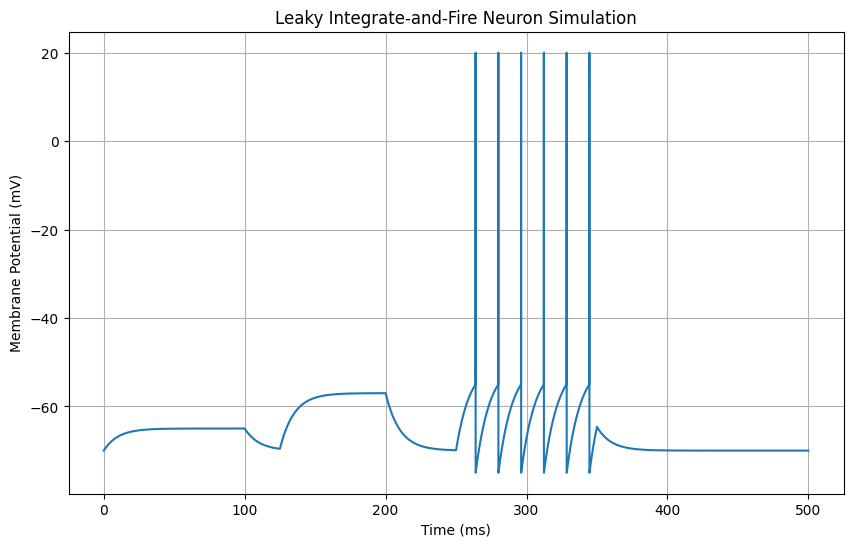

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(timeVector, voltageVector)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Leaky Integrate-and-Fire Neuron Simulation')
plt.grid(True)
plt.show()

In [19]:
print (voltageVector[2540])

-67.30748748194277
